In [58]:
!pip install graphviz

In [59]:
import pandas as pd

bank_data = pd.read_csv("bank-full.csv", sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [60]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


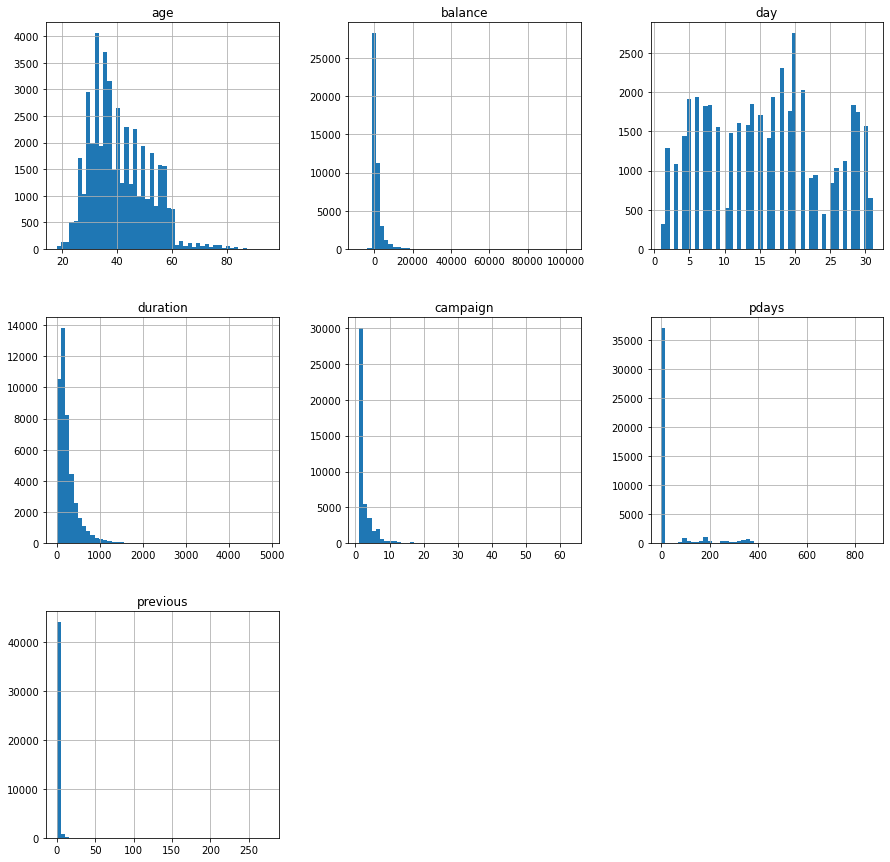

In [61]:
import matplotlib.pyplot as plt
bank_data.hist(bins = 50, figsize=(15,15))
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bank_data, test_size=0.2, random_state=42)

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit

def strat_shuffle_split(df, series_name_cat):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(df, df[series_name_cat]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]

In [64]:
bank_data = train_set.copy()

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='balance', ylabel='age'>,
        <AxesSubplot:xlabel='campaign', ylabel='age'>,
        <AxesSubplot:xlabel='duration', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='balance'>,
        <AxesSubplot:xlabel='balance', ylabel='balance'>,
        <AxesSubplot:xlabel='campaign', ylabel='balance'>,
        <AxesSubplot:xlabel='duration', ylabel='balance'>],
       [<AxesSubplot:xlabel='age', ylabel='campaign'>,
        <AxesSubplot:xlabel='balance', ylabel='campaign'>,
        <AxesSubplot:xlabel='campaign', ylabel='campaign'>,
        <AxesSubplot:xlabel='duration', ylabel='campaign'>],
       [<AxesSubplot:xlabel='age', ylabel='duration'>,
        <AxesSubplot:xlabel='balance', ylabel='duration'>,
        <AxesSubplot:xlabel='campaign', ylabel='duration'>,
        <AxesSubplot:xlabel='duration', ylabel='duration'>]], dtype=object)

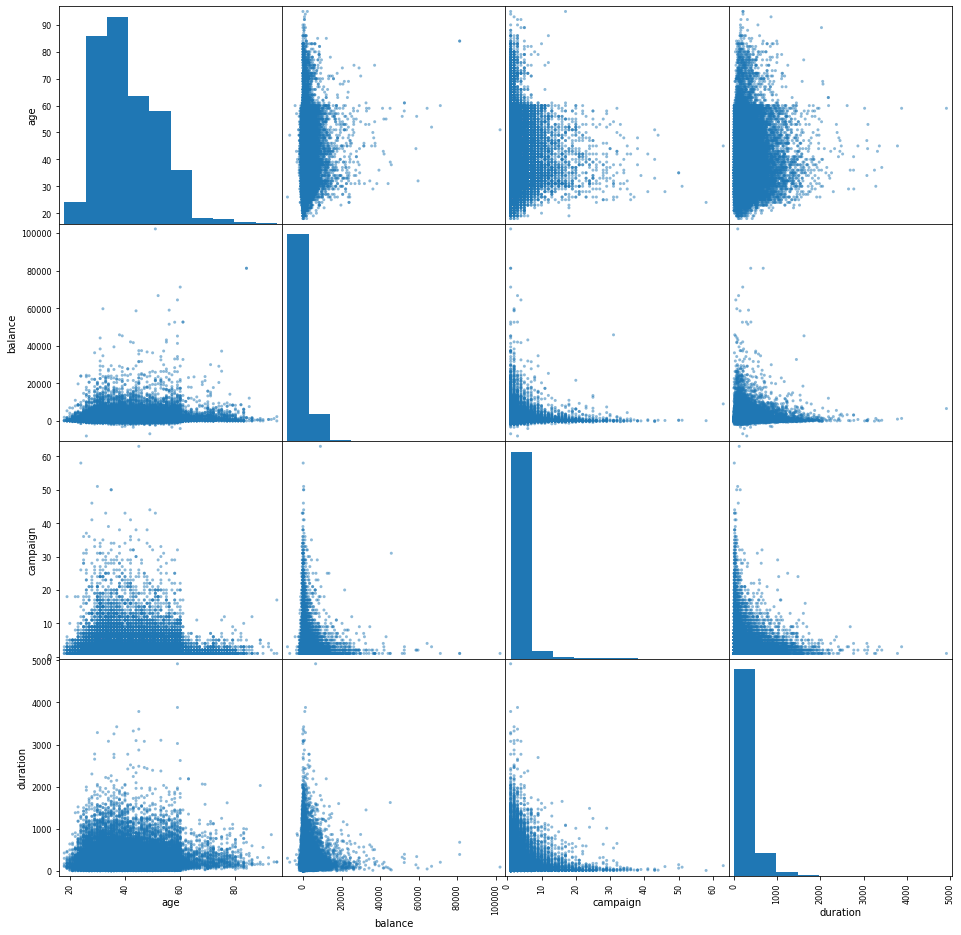

In [65]:
from pandas.plotting import scatter_matrix

atributes = ["age", 'balance', 'campaign', 'duration']
scatter_matrix(bank_data[atributes], figsize=(16,16))

In [66]:
categories = ['job', 'marital', 'education', 'loan', 'contact', 'poutcome']
for i in categories:
    print(f"\n{i}:\n")
    print(bank_data[i].value_counts())



job:

blue-collar      7806
management       7500
technician       6096
admin.           4137
services         3350
retired          1815
self-employed    1286
entrepreneur     1178
unemployed       1023
housemaid        1002
student           742
unknown           233
Name: job, dtype: int64

marital:

married     21804
single      10221
divorced     4143
Name: marital, dtype: int64

education:

secondary    18670
tertiary     10539
primary       5476
unknown       1483
Name: education, dtype: int64

loan:

no     30333
yes     5835
Name: loan, dtype: int64

contact:

cellular     23464
unknown      10385
telephone     2319
Name: contact, dtype: int64

poutcome:

unknown    29560
failure     3901
other       1497
success     1210
Name: poutcome, dtype: int64


In [67]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
categories = ['job', 'marital', 'education', 'loan', 'poutcome']
encoded_features = ["enc_job", "enc_mar", "enc_educ", "enc_loan", "enc_pout"]
for i in range(len(categories)):
    bank_data[encoded_features[i]] = encoder.fit_transform(bank_data[categories[i]])
bank_data[encoded_features]

,enc_job,enc_mar,enc_educ,enc_loan,enc_pout
3344,1,1,0,0,3
17965,9,1,0,0,3
18299,0,1,1,0,3
10221,4,2,2,0,3
32192,1,1,0,0,3
...,...,...,...,...,...
11284,3,2,0,0,3
44732,8,2,2,0,0
38158,9,0,2,0,3
860,5,1,1,0,3


In [68]:
from sklearn import tree

X = bank_data[atributes+encoded_features]
y = bank_data["y"]
classifier = tree.DecisionTreeClassifier(min_samples_leaf = 10)
classifier.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=10)

In [69]:
some_data = bank_data.iloc[100:105]
some_labels = bank_data["y"].iloc[100:105]
some_data = some_data[atributes+encoded_features]
print("predictions\t", classifier.predict(some_data))
print("Labels\t", list(some_labels))

predictions	 ['no' 'no' 'yes' 'no' 'no']
Labels	 ['no', 'no', 'yes', 'no', 'no']


In [70]:
from sklearn.metrics import accuracy_score

predictions = classifier.predict(X)
lin_acc = accuracy_score(y, predictions)
lin_acc

0.9223070117230702

In [71]:
import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH